In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df=pd.read_csv(r'C:\Users\Dell\OneDrive\Documents\datasets\ds_salaries.csv')

In [14]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [16]:
df.duplicated().sum()

1171

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [19]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


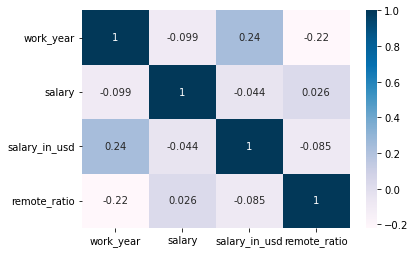

In [20]:
sns.heatmap(df.corr(), annot = True, cmap = "PuBu")
plt.show()

In [21]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,2584,2584,2584,2584,2584,2584,2584
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,1554,2547,598,2107,1893,1929,2028


In [22]:
job_titles=df.job_title.value_counts().head(10)

<AxesSubplot:title={'center':'The Counts of Top 10 Job Titles'}, xlabel='Counts', ylabel='Job Titles'>

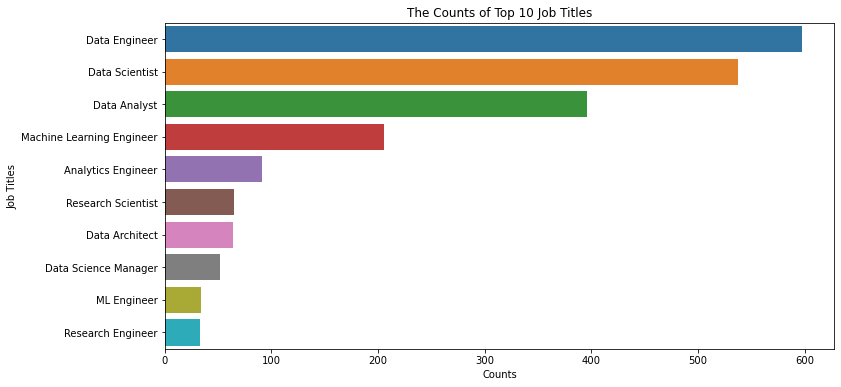

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Counts of Top 10 Job Titles")
plt.ylabel('Job Titles')
plt.xlabel('Counts')
sns.barplot(y=job_titles.index,x=job_titles.values)

In [30]:
job_titles_salaries=df[['job_title','salary_in_usd']]
job_titles_salaries = job_titles_salaries.groupby(df['job_title']).mean().round(0).head(20).sort_values('salary_in_usd',ascending = False).reset_index()

<AxesSubplot:title={'center':'The 20 Job Titles in terms of Salary'}, xlabel='USD', ylabel='job_title'>

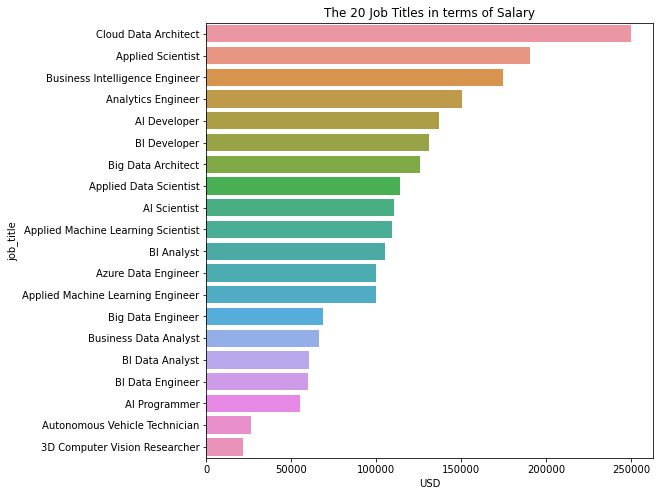

In [32]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=0)
plt.title("The 20 Job Titles in terms of Salary")
plt.ylabel('Job Titles')
plt.xlabel('USD')

sns.barplot(x=job_titles_salaries.salary_in_usd.values,y=job_titles_salaries.job_title)

In [37]:
#top 10 countries with datascience employee

<AxesSubplot:>

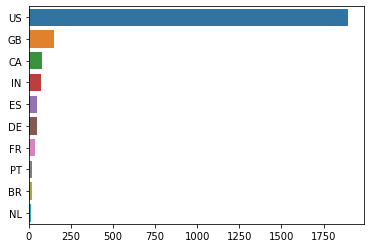

In [42]:
#datascience_employees=salaries[salaries['job_title']=='Data scientist']
top_10_countries = df['employee_residence'].value_counts().head(10)
sns.barplot(y=top_10_countries.index, x=top_10_countries.values)